In [1]:
# try frobenius method??
# test residuals to see if (x, t) solution satisfies original differential equations


# region imports
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import numpy as np
from numpy import sin, cos, tan, atan, cosh, sinh, tanh, abs, linspace, min, max, argmin, argmax, pi, mean, exp, sqrt, zeros, ones, nan
import scipy
import sys
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy.polynomial import chebyshev

sys.path.insert(0,'../../src/harmonic/')
sys.path.insert(0,'../../src/timesteps/')
# endregion

from dswe_harm import *
from cswe_harm import *

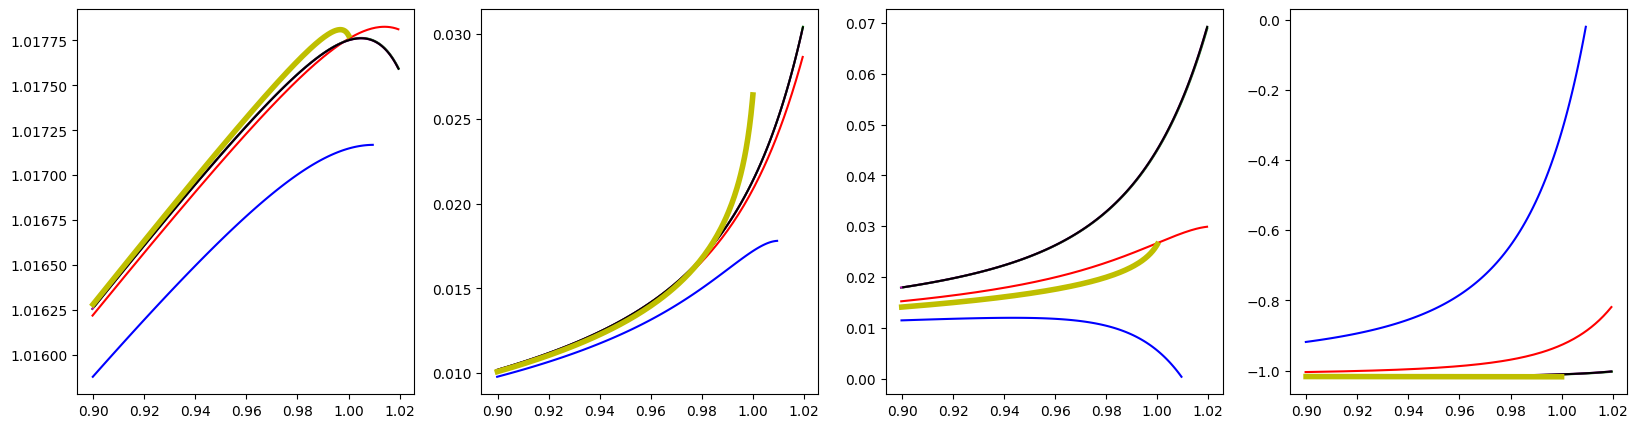

In [2]:



dswe = DSWEHarm()


fig, axs = plt.subplots(1, 4, figsize=(20, 5))

cols = ['b', 'r', 'g', 'm', 'k', 'c']
dms = [1.01, 1.05, 1.1, 1.2, 1.3]

for k in range(len(dms)):
    
    dswe.domain = dms[k]
    dswe.solve_LO()

    st = np.argmin(abs(dswe.y0.x - 0.9))
    end = np.argmin(abs(dswe.y0.x - 1.02))

    for i in range(4):
        axs[i].plot(dswe.y0.x[st:end], dswe.y0.y[i][st:end], cols[k])


cswe = CSWEHarm()
cswe.domain_reduction = 1e-7
cswe.solve_LO_reduced_domain()
st = np.argmin(abs(cswe.y0.x - 0.9))
for i in range(4):
    axs[i].plot(cswe.y0.x[st:], cswe.y0.y[i][st:], linewidth = 4, c= 'y')



plt.show()


# 
# fig, axs = plt.subplots(1, 4, figsize=(20, 5))
# for i in range(4):
#     axs[i].plot(dswe.y0.x[st:], dswe.y0.y[i][st:])

# plt.show()


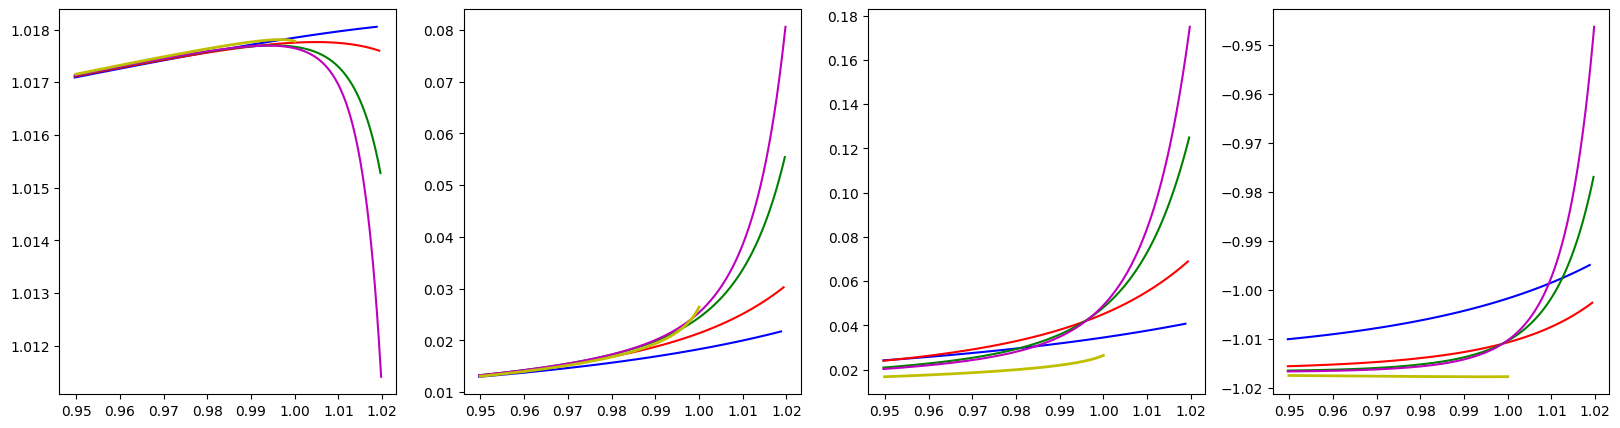

In [3]:
dswe = DSWEHarm()

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

cols = ['b', 'r', 'g', 'm', 'k', 'c']
a_rs = [0.2, 0.1, 0.05, 0.04]

for k in range(len(a_rs)):
    
    dswe.domain = 1.15
    dswe.a_r = a_rs[k]
    dswe.solve_LO()

    st = np.argmin(abs(dswe.y0.x - 0.95))
    end = np.argmin(abs(dswe.y0.x - 1.02))

    for i in range(4):
        axs[i].plot(dswe.y0.x[st:end], dswe.y0.y[i][st:end], cols[k])


cswe = CSWEHarm()
cswe.domain_reduction = 1e-7
cswe.solve_LO_reduced_domain()
st = np.argmin(abs(cswe.y0.x - 0.95))
for i in range(4):
    axs[i].plot(cswe.y0.x[st:], cswe.y0.y[i][st:], linewidth = 2, c= 'y')




plt.show()


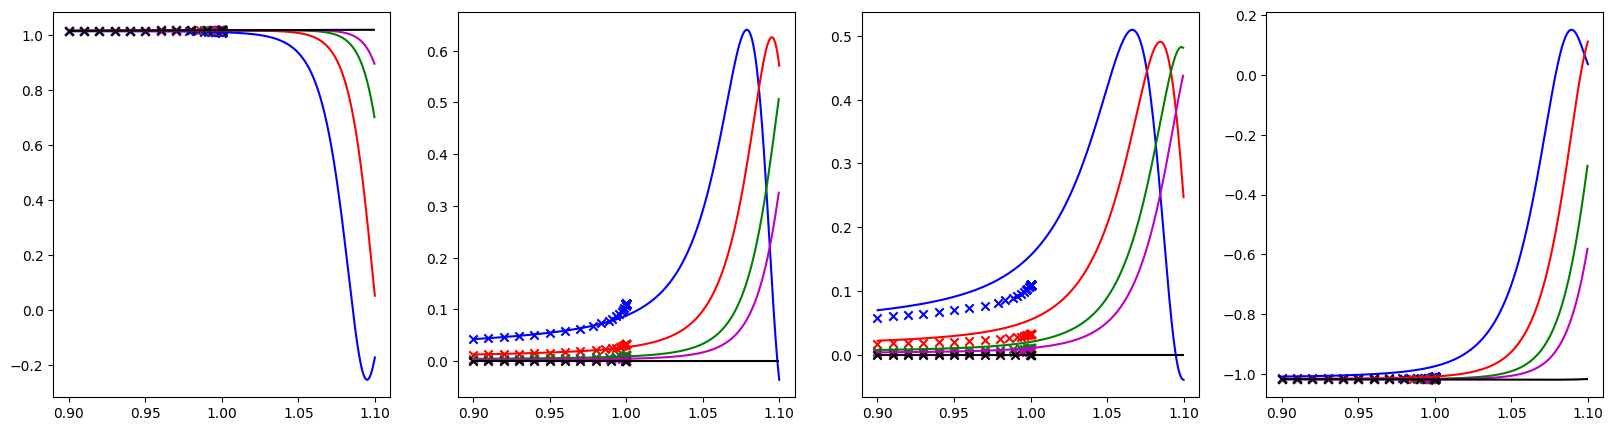

In [4]:
dswe = DSWEHarm()

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

cols = ['b', 'r', 'g', 'm', 'k', 'c']


rs = [1, 0.3, 0.1, 0.05, 0]
for k in range(len(rs)):
    
    dswe.domain = 1.15
    dswe.a_r = 0.1
    dswe.r = rs[k]
    
    dswe.solve_LO()

    st = np.argmin(abs(dswe.y0.x - 0.9))
    end = np.argmin(abs(dswe.y0.x - 1.1))

    for i in range(4):
        axs[i].plot(dswe.y0.x[st:end], dswe.y0.y[i][st:end], cols[k])


cswe = CSWEHarm()
cswe.domain_reduction = 1e-7

for k in range(len(rs)):
    

    cswe.r = rs[k]
    
    cswe.solve_LO_reduced_domain()

    st = np.argmin(abs(cswe.y0.x - 0.9))
    end = np.argmin(abs(cswe.y0.x - 1.1))

    for i in range(4):
        axs[i].scatter(cswe.y0.x[st::10], cswe.y0.y[i][st::10], c=cols[k], marker = 'x')





plt.show()